<a href="https://colab.research.google.com/github/daniel-saunders-phil/dowry-game/blob/main/Reproducible_data_analysis_similiarity_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib as pl

# Sensitivity analysis for random pairing

In [53]:
url = "https://raw.githubusercontent.com/daniel-saunders-phil/dowry-game/main/data/Ethnicity%20bias%20in%20social%20learning%20-%20two%20pop%20immutable%20markers%20basic-parameters-2-table.csv"

data = pd.read_csv(url)
data

,[run number],mr_marker,random-pairing,game,mr_learning_style,ethnic_bias?,mr_strategy,[step],success?,collapse?
0,3,0,0.1,1,0,True,0,1350,True,False
1,1,0,0.1,1,0,True,0,1840,True,False
2,2,0,0.1,1,0,True,0,1953,True,False
3,4,0,0.1,1,0,True,0,2526,True,False
4,5,0,0.1,1,0,True,0,1645,True,False
...,...,...,...,...,...,...,...,...,...,...
3995,3996,0,1.0,4,0,True,0,15,False,True
3996,3997,0,1.0,4,0,True,0,11,False,True
3997,3998,0,1.0,4,0,True,0,15,False,True
3998,3999,0,1.0,4,0,True,0,17,False,True


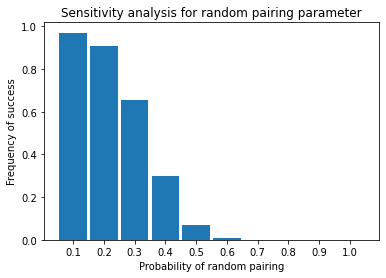

In [54]:
success = data["success?"]
pairing = data["random-pairing"]

params = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

success_by_pairing = [success[pairing == p] for p in params]
mean_success_by_pairing_param = [np.mean(l) for l in success_by_pairing]

plt.bar(params,mean_success_by_pairing_param,width=.09)
plt.xticks(params)
plt.ylabel('Frequency of success')
plt.xlabel('Probability of random pairing')
plt.title('Sensitivity analysis for random pairing parameter')
plt.show()

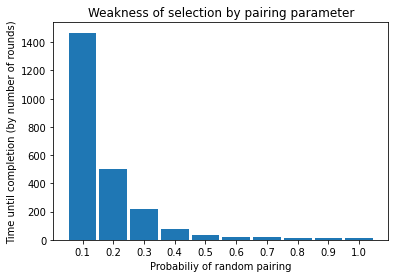

In [55]:
steps = data['[step]']

steps_by_pairing = [steps[pairing == p] for p in params]
mean_steps_by_pairing_param = [np.mean(l) for l in steps_by_pairing]

plt.bar(params,mean_steps_by_pairing_param,width=.09)
plt.xticks(params)
plt.title("Weakness of selection by pairing parameter")
plt.ylabel('Time until completion (by number of rounds)')
plt.xlabel('Probabiliy of random pairing')
plt.show()

# Initial frequency

In [56]:
url = "https://raw.githubusercontent.com/daniel-saunders-phil/dowry-game/main/data/Ethnicity%20bias%20in%20social%20learning%20-%20two%20pop%20immutable%20markers%20sensitivity%20to%20initial%20level%20of%20ethnic%20learning-table.csv"

data = pd.read_csv(url,sep=",",lineterminator='\n')
data

,[run number],mr_marker,random-pairing,game,initial_proportion_ethnic_learning,mr_learning_style,ethnic_bias?,mr_strategy,[step],success?,collapse?\r
0,3,0,0.1,1,0.1,0,True,0,17,False,true\r
1,4,0,0.1,1,0.1,0,True,0,21,False,true\r
2,1,0,0.1,1,0.1,0,True,0,20,False,true\r
3,2,0,0.1,1,0.1,0,True,0,24,False,true\r
4,6,0,0.1,1,0.1,0,True,0,14,False,true\r
...,...,...,...,...,...,...,...,...,...,...,...
2495,2498,0,0.5,1,0.5,0,True,0,18,False,true\r
2496,2495,0,0.5,1,0.5,0,True,0,30,False,true\r
2497,2497,0,0.5,1,0.5,0,True,0,18,False,true\r
2498,2499,0,0.5,1,0.5,0,True,0,21,False,true\r


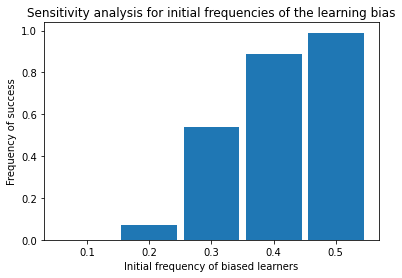

In [57]:
params = [0.1,0.2,0.3,0.4,0.5]
indexer = [0,1,2,3,4]

selectors = [data['random-pairing'] == p for p in params]

summary = []
for j in indexer:
    filtered_data = data[selectors[j]]
    selector_2 = [filtered_data['initial_proportion_ethnic_learning'] == p for p in params]

    frequency_of_success = []
    for i in indexer:
        filtered_data_2 = filtered_data[selector_2[i]]
        frequency_of_success.append(np.mean(filtered_data_2['success?']))

    summary.append(frequency_of_success)
    
plt.bar(params,summary[0],width=.09)
plt.xticks(params)
plt.xlabel('Initial frequency of biased learners')
plt.ylabel('Frequency of success')
plt.title("Sensitivity analysis for initial frequencies of the learning bias")
plt.show()

# Playing to learning ratio

In [58]:
url = "https://raw.githubusercontent.com/daniel-saunders-phil/dowry-game/main/data/Ethnicity%20bias%20in%20social%20learning%20-%20plays%20per%20learn%20sensitivity-table.csv"

data = pd.read_csv(url)
data

,[run number],random-pairing,initial_proportion_ethnic_learning,mr_learning_style,mr_strategy,plays_per_learn,[step],success?,collapse?
0,2,0.1,0.1,0,0,10,20,False,True
1,1,0.1,0.1,0,0,10,20,False,True
2,3,0.1,0.1,0,0,10,24,False,True
3,6,0.1,0.1,0,0,10,13,False,True
4,7,0.1,0.1,0,0,10,19,False,True
...,...,...,...,...,...,...,...,...,...
2495,2498,0.5,0.5,0,0,10,26,False,True
2496,2500,0.5,0.5,0,0,10,156,True,False
2497,2497,0.5,0.5,0,0,10,190,True,False
2498,2499,0.5,0.5,0,0,10,193,True,False


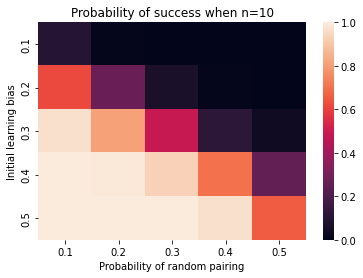

In [59]:
params = [0.1,0.2,0.3,0.4,0.5]
indexer = [0,1,2,3,4]

selectors = [data['initial_proportion_ethnic_learning'] == p for p in params]

summary = []
for j in indexer:
    filtered_data = data[selectors[j]]
    selector_2 = [filtered_data['random-pairing'] == p for p in params]

    frequency_of_success = []
    for i in indexer:
        filtered_data_2 = filtered_data[selector_2[i]]
        frequency_of_success.append(np.mean(filtered_data_2['success?']))

    summary.append(frequency_of_success)
    
summary = pd.DataFrame(summary,columns=params,index=params)
summary

import seaborn as sns

sns.heatmap(summary)
plt.title("Probability of success when n=10")
plt.ylabel("Initial learning bias")
plt.xlabel("Probability of random pairing")
plt.show()